In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03-06-2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09-06-2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12-06-2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21-06-2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
#these columns have very few missing values... so convert them into either 1 or 2.
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [4]:
df.PREGNANT = df.PREGNANT.replace(98, 2)
df.PREGNANT = df.PREGNANT.replace(97, 2)

In [5]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03-06-2020,97,1,72,2,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09-06-2020,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12-06-2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21-06-2020,97,2,68,2,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df.drop("INTUBED", axis = 1, inplace = True)
df.drop("ICU", axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025152 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1025152 non-null  int64 
 1   MEDICAL_UNIT          1025152 non-null  int64 
 2   SEX                   1025152 non-null  int64 
 3   PATIENT_TYPE          1025152 non-null  int64 
 4   DATE_DIED             1025152 non-null  object
 5   PNEUMONIA             1025152 non-null  int64 
 6   AGE                   1025152 non-null  int64 
 7   PREGNANT              1025152 non-null  int64 
 8   DIABETES              1025152 non-null  int64 
 9   COPD                  1025152 non-null  int64 
 10  ASTHMA                1025152 non-null  int64 
 11  INMSUPR               1025152 non-null  int64 
 12  HIPERTENSION          1025152 non-null  int64 
 13  OTHER_DISEASE         1025152 non-null  int64 
 14  CARDIOVASCULAR        1025152 non-null  int64 
 15

In [8]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

In [9]:
df["MONTH"] = df.DATE_DIED.str.split("-", expand = True)[1]
df["YEAR"] = df.DATE_DIED.str.split("-", expand = True)[2]

In [10]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,MONTH,YEAR
0,2,1,1,1,03-05-2020,1,65,2,2,2,...,2,1,2,2,2,2,2,1,05,2020
1,2,1,2,1,03-06-2020,1,72,2,2,2,...,2,1,2,2,1,1,2,2,06,2020
2,2,1,2,2,09-06-2020,2,55,2,1,2,...,2,2,2,2,2,2,2,1,06,2020
3,2,1,1,1,12-06-2020,2,53,2,2,2,...,2,2,2,2,2,2,2,2,06,2020
4,2,1,2,1,21-06-2020,2,68,2,1,2,...,2,1,2,2,2,2,2,1,06,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,...,2,2,2,2,2,2,2,2,99,99
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,...,2,1,2,2,2,2,2,2,99,99
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,...,2,2,2,2,2,2,2,2,99,99
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,...,2,2,2,2,2,2,2,2,99,99


In [11]:
y1=df[(df['YEAR']=='2020' ) | (df['YEAR']=='2021' )]
y1['YEAR'].value_counts()

2020    74402
2021      312
Name: YEAR, dtype: int64

In [12]:
df.drop(["DATE_DIED", "MONTH", "YEAR"], axis = 1, inplace = True)

In [13]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,2
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,2
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,2,40,2,2,2,2,2,2,2,2,2,2,2,2
1048571,1,13,2,2,2,51,2,2,2,2,2,1,2,2,2,2,2,2
1048572,2,13,2,1,2,55,2,2,2,2,2,2,2,2,2,2,2,2
1048573,2,13,2,1,2,28,2,2,2,2,2,2,2,2,2,2,2,2


In [14]:
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"] - 1
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,0
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,0
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,2,40,2,2,2,2,2,2,2,2,2,2,2,1
1048571,1,13,2,2,2,51,2,2,2,2,2,1,2,2,2,2,2,1
1048572,2,13,2,1,2,55,2,2,2,2,2,2,2,2,2,2,2,1
1048573,2,13,2,1,2,28,2,2,2,2,2,2,2,2,2,2,2,1


In [15]:
X = df.drop("CLASIFFICATION_FINAL", axis = 1)
y = df["CLASIFFICATION_FINAL"]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=68)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 1. Logistic

In [18]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [19]:
ypred_train=log_model.predict(X_train)
ypred_test=log_model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.6600808800372349
0.65943631196634


In [21]:
from sklearn.model_selection import cross_val_score
print("Cross validation score:",cross_val_score(log_model,X,y,cv=5).mean())

Cross validation score: 0.6523862148450726


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[ 29345,  87786],
       [ 16953, 173462]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.63      0.25      0.36    117131
           1       0.66      0.91      0.77    190415

    accuracy                           0.66    307546
   macro avg       0.65      0.58      0.56    307546
weighted avg       0.65      0.66      0.61    307546



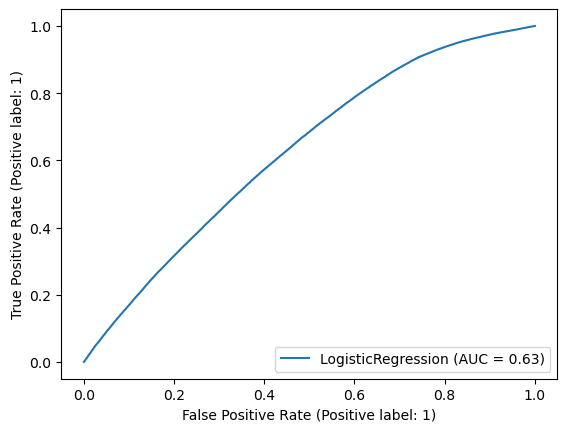

In [24]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,X_test,y_test)
plt.show()

### Gradient boost

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

#Prediction
ypred_train=gb_model.predict(X_train)
ypred_test=gb_model.predict(X_test)

#Evaluation
#1.Train & test accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy",accuracy_score(y_train,ypred_train))
print("Test accuracy",accuracy_score(y_test,ypred_test))

#2.Cross Validation Score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(gb_model,X,y,cv=5)
print("cross validation score:",scores.mean())

Train accuracy 0.6642600535669991
Test accuracy 0.6628179199209224
cross validation score: 0.6124419753415186


### Hyper parameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

estimator=GradientBoostingClassifier()

param_grid={'n_estimators':[1,5,10,20,40,60,100],
            'learning_rate':[0.1,0.2,0.3,0.5,0.8,1]}

grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_params_)
grid.best_estimator_

{'learning_rate': 0.5, 'n_estimators': 100}


GradientBoostingClassifier(learning_rate=0.5)

### feature imp

In [27]:
grid.best_estimator_.feature_importances_

array([0.01543203, 0.06265418, 0.01911159, 0.1827689 , 0.40792474,
       0.22227634, 0.00056514, 0.01074099, 0.00686678, 0.00136605,
       0.00796003, 0.00284916, 0.00392045, 0.00205076, 0.03631642,
       0.00528105, 0.01191541])

In [28]:
feats=pd.DataFrame(index=X.columns,
                   data=grid.best_estimator_.feature_importances_,
                  columns=['Importance'])
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
USMER,0.015432
MEDICAL_UNIT,0.062654
SEX,0.019112
PATIENT_TYPE,0.182769
PNEUMONIA,0.407925
AGE,0.222276
DIABETES,0.010741
OBESITY,0.036316
TOBACCO,0.011915


In [29]:
imp_features_list=feats[feats['Importance']>0.01].index.to_list()
imp_features_list

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'PNEUMONIA',
 'AGE',
 'DIABETES',
 'OBESITY',
 'TOBACCO']

### Gradient boost with best hyper parameter

In [32]:
X_imp=X[imp_features_list]    #dropped unimp features
y=df['CLASIFFICATION_FINAL']

X_train,X_test,y_train,y_test= train_test_split(X_imp,y,test_size=0.3,random_state=68)

gb_bhp=GradientBoostingClassifier(n_estimators=100)
gb_bhp.fit(X_train,y_train)

ypred_train=gb_bhp.predict(X_train)
predictions=gb_bhp.predict(X_test)

from sklearn.metrics import accuracy_score
print("Train_accuracy:",accuracy_score(y_train,ypred_train))
print("Test_accuracy:",accuracy_score(y_test,predictions))

scores=cross_val_score(gb_bhp,X,y,cv=5)
print("Cross validation score:", scores.mean())

Train_accuracy: 0.6629376008561801
Test_accuracy: 0.661123864397521
Cross validation score: 0.6124419753415186
